**Load dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Iris.csv", header=None,
                 names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [ ]:
# Nếu file có cột Id thì xóa
if "Id" in df.columns:
    df = df.drop(columns=["Id"])

# Ép kiểu các cột số về float
num_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
df.dtypes


,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
class,object


In [ ]:
df["class"].value_counts()


,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50
Species,1


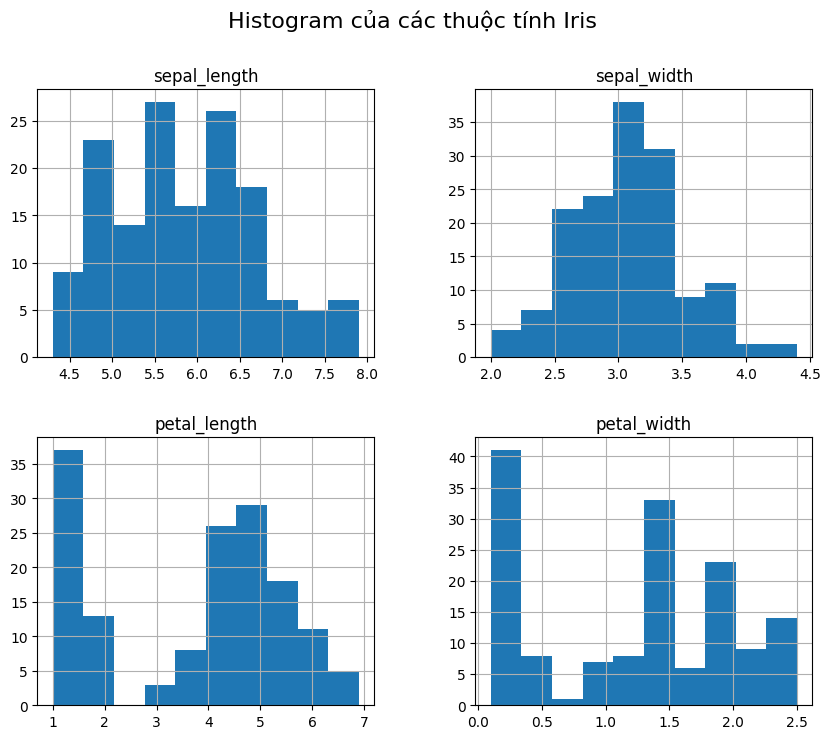

In [ ]:
df.hist(figsize=(10, 8))
plt.suptitle("Histogram của các thuộc tính Iris", fontsize=16)
plt.show()


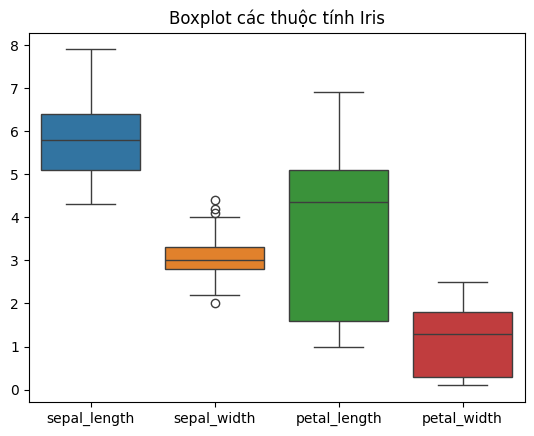

In [ ]:
sns.boxplot(data=df[num_cols])
plt.title("Boxplot các thuộc tính Iris")
plt.show()


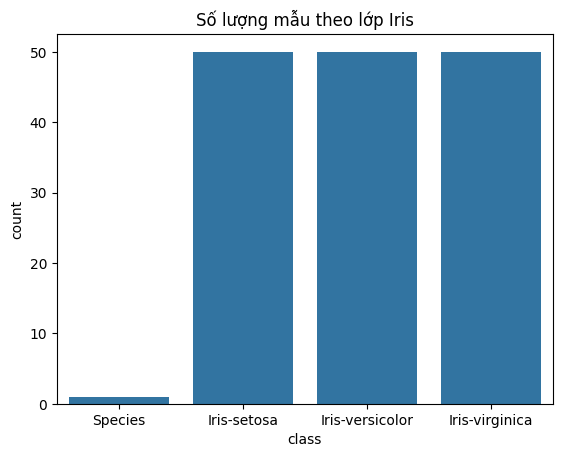

In [ ]:
sns.countplot(x="class", data=df)
plt.title("Số lượng mẫu theo lớp Iris")
plt.show()


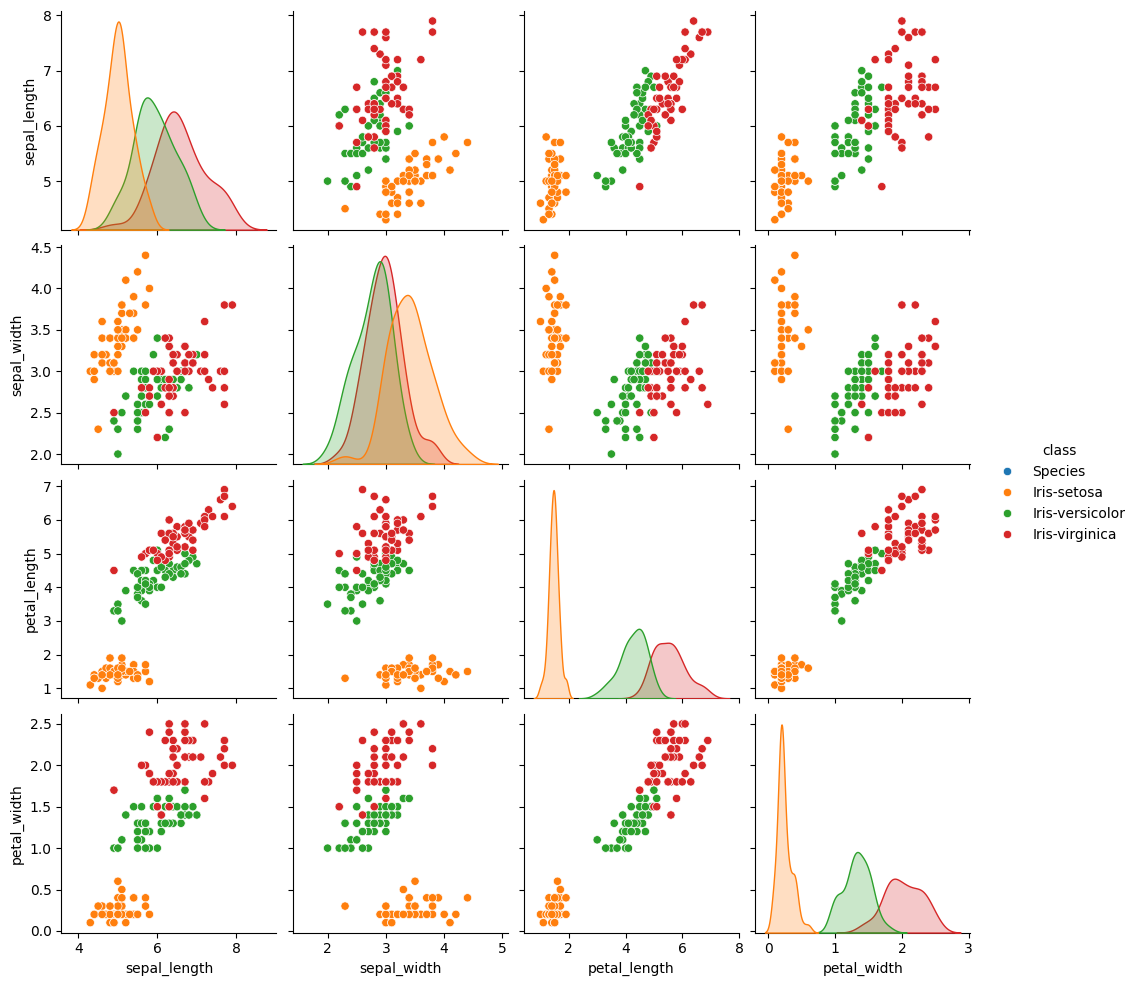

In [ ]:
sns.pairplot(df, hue="class")
plt.show()


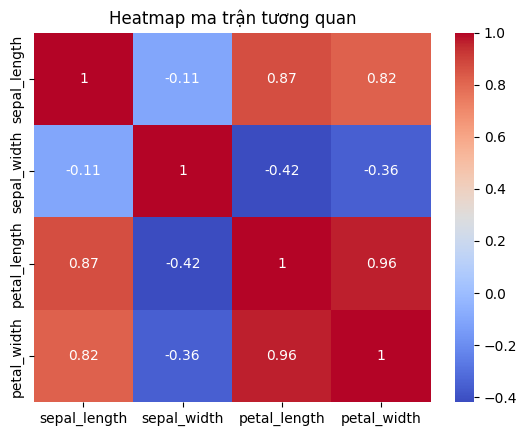

In [ ]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap ma trận tương quan")
plt.show()


# Import thư viện

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Tách đặc trưng x và nhãn y

In [ ]:
X = df.iloc[:, :-1]   # 4 cột đặc trưng
y = df.iloc[:, -1]    # cột loại hoa


# Chia tập dữ liệu train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train mô hình Naive Bayes và dự đoán

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Đánh giá mô hình

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))


Độ chính xác: 1.0

Báo cáo phân loại:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Thử dự đoán bằng một bông hoa mới

In [ ]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # sepal_length, sepal_width, petal_length, petal_width
result = model.predict(sample)
print("Dự đoán loài hoa:", result[0])


Dự đoán loài hoa: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
